In [1]:
import copy
import pickle
import numpy as np
import glob
import os 
import sys

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord
from astropy import wcs
import astropy.units as u

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

from sn_cutout import ellipse

In [2]:
# we want the sn catalog
__current_dir__=os.path.abspath(os.getcwd())
__host_data_dir__=os.path.join(__current_dir__,"..","host_hists/host_data/")

candels_Ias = pickle.load(open(os.path.join(__host_data_dir__+'candels_Ias.pkl'),'rb'))

In [3]:
# the sn nicknames so we can name the file
nicks = [candels_Ias[i][0]['name'] for i in range(len(candels_Ias))]
# the sn coords so can mark the sn location at center of cutout
sn_coords = [SkyCoord(candels_Ias[i][0]['RA'],candels_Ias[i][0]['DEC'],unit = (u.hourangle,u.deg)) for i in range(len(candels_Ias))]

# the nearby survey
nearbys = [candels_Ias[i][1] for i in range(len(candels_Ias))]
# the host [survey,nearest ell rad,nearby ell rad]
hosts = [candels_Ias[i][2] for i in range(len(candels_Ias))]

# updating the surveys
updated_nearbys = []
for i in range(len(nearbys)):
    update = update_galaxy_survey.update_survey(nearbys[i])
    updated_nearbys.append(update)

updated_hosts = []
for i in range(len(hosts)):
    update = update_galaxy_survey.update_survey(hosts[i][0])
    updated_hosts.append([update,hosts[i][1],hosts[i][2]])

# renaming for clarity
nearbys = updated_nearbys
hosts = updated_hosts

In [ ]:
# grab the skycoord and elliptical parameters for each possible host of each sn
# ellipse function needs it like [ [skycoords],[as],[bs],[thetas] ],...] where ... 
possible_hosts = []
for i in range(len(candels_Ias)):
    

ellipse(file, possible_hosts, sn_position, title, save=False, show=False)
requires 4 arguments; 2 optional

1. file is the cutout fits file for the sn we are going to put the ellipses on. it requires the sn id/nickname.
2. possible_hosts should be a list of the nearby hosts, each element in list another 4 element list with the given candidates [skycoord, a, b, theta]. 
The ellipse function isn't smart enough to get this from a given nearby survey which is why this needs to be put together in the nb.
3. skycoord of sn loc
4. title is for the figure, maybe just a string with sn id

optionally save the output figure with ellipses on cutout to a folder nearby_host_ellipses and/or show in nb

[<SkyCoord (ICRS): (ra, dec) in deg
    (215.136416, 53.045854)>, 2.514, 2.217, -34.5]
-0.017784216


TypeError: 'Longitude' object with a scalar value does not support indexing

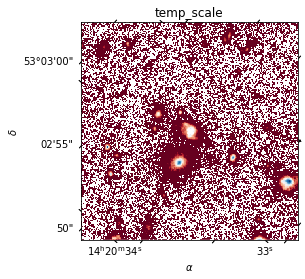

In [10]:
for i in range(len(candels_Ias)):
    # the SN nickname
    nick = nicks[i]
    # the SN skycoord location
    sn_loc = sn_coords[i]
    
    # the nearby to the SN
    nearby = nearbys[i]
    # getting list of the ids, elliptical parameters for each nearby for this SN
    ids = [i for i in nearby.mass[nearby.ids]]
    nearby_coords = [i for i in nearby.gal_skycoords()]
    a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
    b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
    theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
    
    
    # putting the lists into format needed for second argument of ellipse function.
    possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse]
    print(possible_hosts)
    ellipse(nick.lower()+'.fits',possible_hosts,sn_loc,title='temp_scale',save=False,show=True)

In [21]:
nearby.b_ellip

'b_image'

In [3]:

for nick in nicks:
    print('Looking at SN:',nick.lower())
    ellip_params = []

    shapes = []
    
    
    """
    for i in candels_possible_hosts_full[nicks.index(nick)]:
        if nick[:2].lower() == 'co':
            shapes.append(i[-1][-36:-27])
        elif nick[:2].lower() == 'eg':
            shapes.append(i[-1][457:466])
        elif nick[:2].lower() == 'gs':
            shapes.append(i[-1][393:401])
        elif nick[:2].lower() == 'gn':
            shapes.append(i[-1][83:86])
        elif nick[:2].lower() == 'ud':
            shapes.append(i[-1][91:99])
    # cxx,cyy,cxy,a,b,da,db,theta,dtheta...a,b,theta what we need
    # cos ''_full[-1][-36:-27] ...3,4,7
    # egs ''_full[-1][457:466]... 3,4,7
    # goods-s ''_full[-1][393:401]...3,4,7
    # uds ''_full[-1][91:99]...3,5,7
    # goods-n ''_full[-1][83:86]...1,2,3 
    """
    
    
#ellipse(nick.lower()+'.fits',ellip_params,sn_position=sn_coords,title='temp_scale',save=False,show=True)

Looking at SN: egs11oba
Looking at SN: egs11per
Looking at SN: egs11tho
Looking at SN: egs13rut
Looking at SN: egs13wai
Looking at SN: gnd12cal
Looking at SN: gnd12col
Looking at SN: gnd12tom
Looking at SN: gnd13cam
Looking at SN: gnd13gar
Looking at SN: gnd13jay
Looking at SN: gnd13sto
Looking at SN: gsd10pri
Looking at SN: gsd11mad
Looking at SN: gsd11was
Looking at SN: gsd11wor
Looking at SN: gsd12agn
Looking at SN: uds10wil
Looking at SN: uds11hug


with open (r'C:/Users/Kyle/Documents/school/research/summer18/Catalog/supernovae/sourcefiles/candels_sn', 'rb') as fp:
    candels = pickle.load(fp)
"""
cutout_filenames = [candels[i]['name'] for i in range(len(candels))]
coords = [SkyCoord(candels[i]['RA'],candels[i]['DEC'], unit=(u.hourangle,u.deg)) for i in range(len(candels))]
print(cutout_filenames)
print(coords)
for i in range(len(candels)):
    sized = u.Quantity((20, 20), u.arcsec)
    download_image_save_cutout(coords[i],sized,cutout_filename=cutout_filenames[i]+'.fits')
"""

with open (r'C:/Users/Kyle/Documents/school/research/summer18/Catalog/candels_possible_hosts', 'rb') as fp:
    candels_possible_hosts = pickle.load(fp)
with open('candels_possible_hosts.pkl','rb') as fp:
    candels_possible_hosts_full = pickle.load(fp)










nicks = [candels_possible_hosts[i]['snid'][0] for i in range(len(candels_possible_hosts))]
for nick in nicks:
    #print('Looking at SN:',nick.lower())
    ellip_params = []

    shapes = []
    #print('Number of hosts within 5 arcsec are:',len(candels_possible_hosts_full[nicks.index(nick)]))
    for i in candels_possible_hosts_full[nicks.index(nick)]:
        if nick[:2].lower() == 'co':
            shapes.append(i[-1][-36:-27])
        elif nick[:2].lower() == 'eg':
            shapes.append(i[-1][457:466])
        elif nick[:2].lower() == 'gs':
            shapes.append(i[-1][393:401])
        elif nick[:2].lower() == 'gn':
            shapes.append(i[-1][83:86])
        elif nick[:2].lower() == 'ud':
            shapes.append(i[-1][91:99])
    # cxx,cyy,cxy,a,b,da,db,theta,dtheta...a,b,theta what we need
    # cos ''_full[-1][-36:-27] ...3,4,7
    # egs ''_full[-1][457:466]... 3,4,7
    # goods-s ''_full[-1][393:401]...3,4,7
    # uds ''_full[-1][91:99]...3,5,7
    # goods-n ''_full[-1][83:86]...1,2,3 

    #print('They are at coords and have a,b,theta:')
    #for i in range(len(candels_possible_hosts[nicks.index(nick)])):
    for i in range(3):
        if nick[:2].lower() == 'co' or nick[:2].lower() == 'eg' or nick[:2].lower() == 'gs':
            a = 3
            b = 4
            theta = 7
        elif nick[:2].lower() == 'gn':
            a = 0
            b = 1
            theta  = 2
        elif nick[:2].lower() == 'ud':
            a = 3
            b = 5
            theta = 7
        ellip_params.append([candels_possible_hosts_full[nicks.index(nick)][i][0][0],
                     shapes[i][a],shapes[i][b],shapes[i][theta]])
    #print(ellip_params)
    #print(candels_possible_hosts[nicks.index(nick)]['snid'][0])
    nicksy = [candels[i]['name'] for i in range(len(candels))]
    #print(candels[0])
    sn_coords = SkyCoord(candels[nicksy.index(nick)]['RA'],candels[nicksy.index(nick)]['DEC'], unit=(u.hourangle,u.deg))
    #print('SN is at:',sn_coords)
    #print(candels[nicksy.index(nick)]['name'])

    ellipse(nick.lower()+'.fits',ellip_params,sn_position=sn_coords,title='temp_scale',save=False,show=True)